In [1]:
# Access the Dataset
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('./weather-history-dataset.csv')

In [2]:
# Retrieve a concise summary and statistical overview of this DataFrame.
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB
None
       Temperature (C)  Apparent Temperature (C)      Humidity  

In [3]:
# Drop the null values and remove the duplicates.
print(df.isnull().sum())
df = df.dropna()
# Remove duplicates
# df = df.drop_duplicates()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64


In [5]:
# Remove the outliers
# from scipy import stats
# import numpy as np
# z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))# 3 standard deviations from the mean
# threshold = 3

# Remove rows where any Z-score in a row exceeds the threshold
# df = df[(z_scores < threshold).all(axis=1)]

In [4]:
import seaborn as sns

In [5]:
# Visualization
# Convert the Formatted Date column to a datetime object with UTC timezone.
# Create new columns (Year, Month, Day) by extracting these values from the Date column.
# Check the data type of the newly converted Date column.
# Set the Date column as the index of the DataFrame.
df['Date'] = pd.to_datetime(df['Formatted Date'], utc=True)
print(df['Date'].dtype)
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df.set_index('Date', inplace=True)

datetime64[ns, UTC]


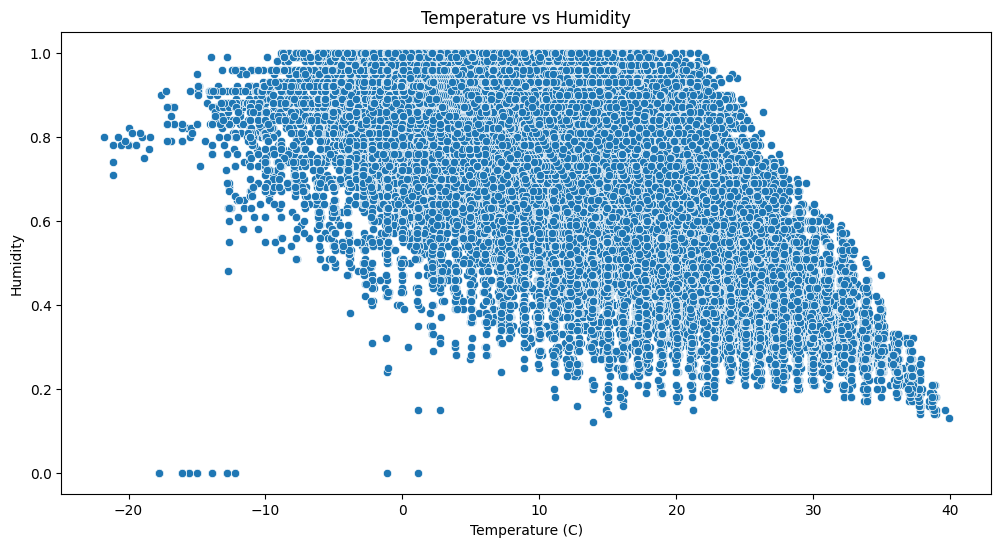

In [6]:
# Create a scatter plot with dimensions 12X6 with x axis representing 'Temperature(C)' and y axis representing 'humidity'.
plt.figure(figsize=(12,6))
sns.scatterplot(x='Temperature (C)',y='Humidity',data=df)
plt.title('Temperature vs Humidity')
plt.show()

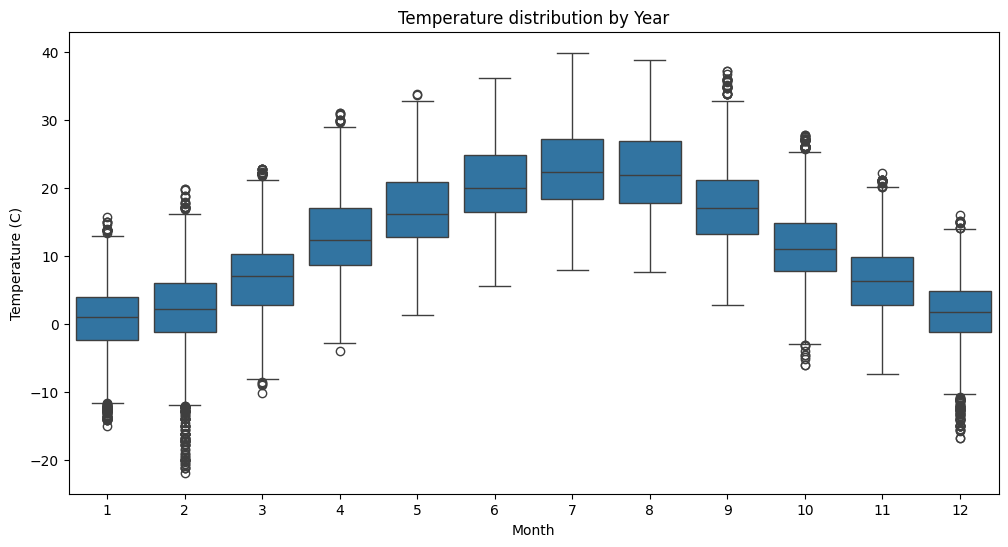

In [7]:
# Create a box plot where the x-axis represents 'Month' and the y-axis represents 'Temperature (C)' andset the plot title to "Temperature distribution by Year".
plt.figure(figsize=(12,6))
sns.boxplot(x='Month', y='Temperature (C)', data=df)
plt.title('Temperature distribution by Year')
plt.show()

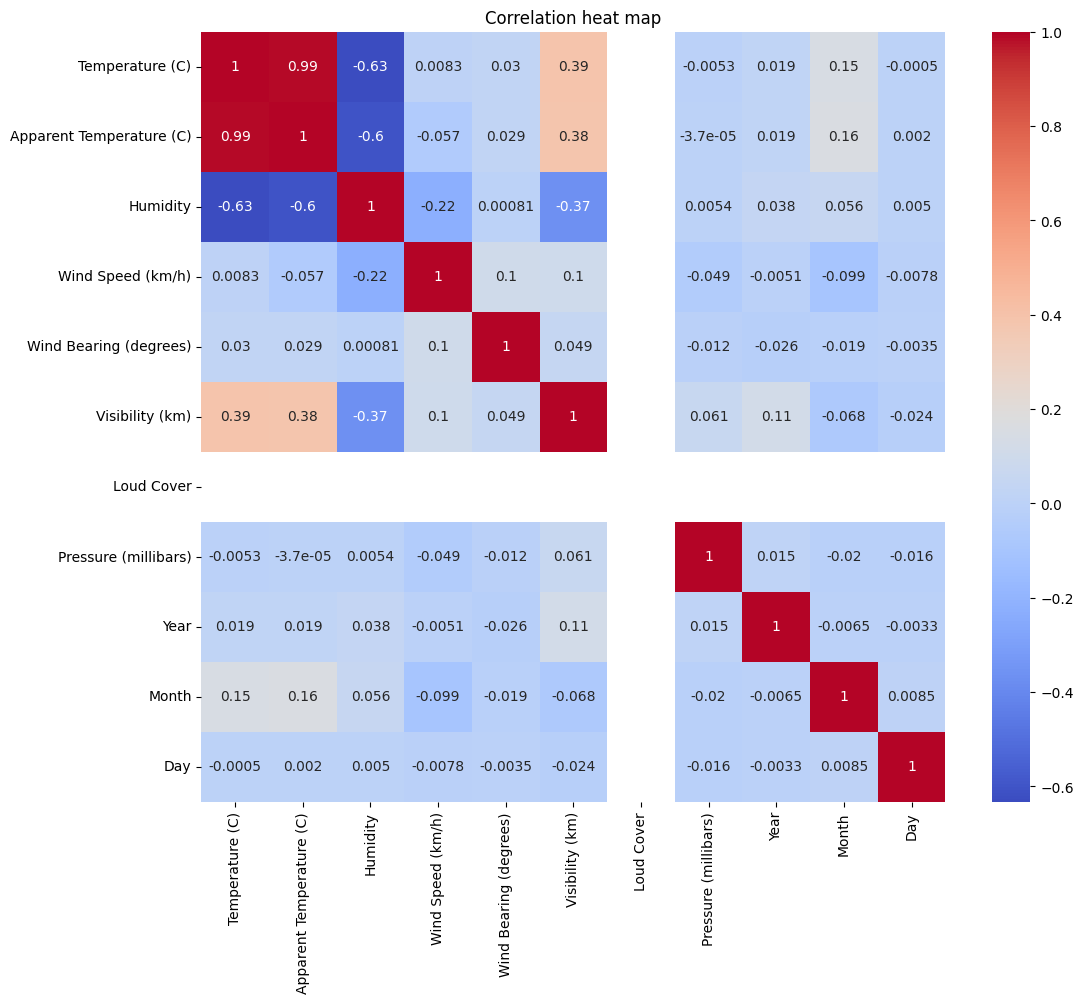

In [8]:
# Generate a heatmap that visualizes the correlation between numerical columns in a DataFrame.
import numpy as np
ndf=df.select_dtypes(include=[np.number])
plt.figure(figsize=(12,10))
sns.heatmap(ndf.corr(),annot=True,cmap='coolwarm')
plt.title('Correlation heat map')
plt.show()

<Figure size 1200x1000 with 0 Axes>

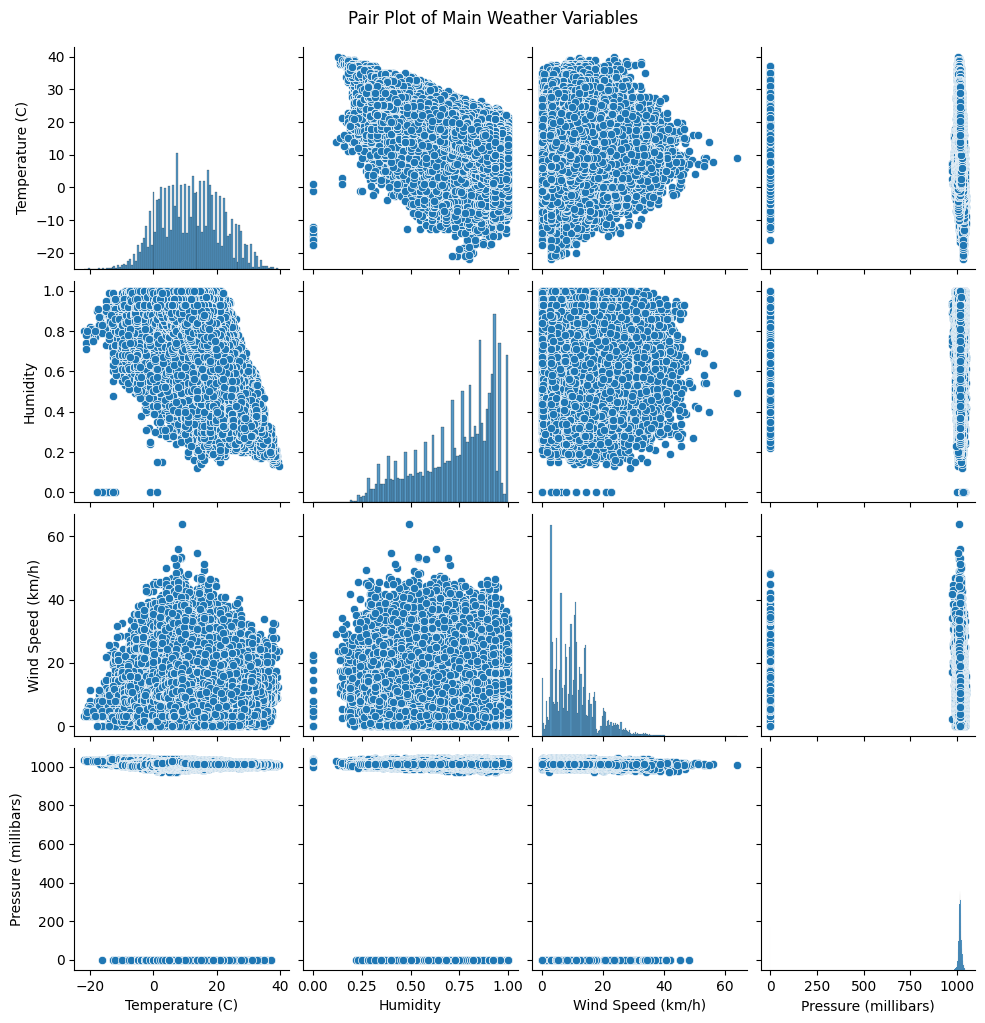

In [9]:
# Generate a pair plot of four specific weather-related variables (Temperature, Humidity, Wind Speed, and Pressure).
plt.figure(figsize=(12,10))
sns.pairplot(df[['Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Pressure (millibars)']])
plt.suptitle('Pair Plot of Main Weather Variables', y=1.02)
plt.show()

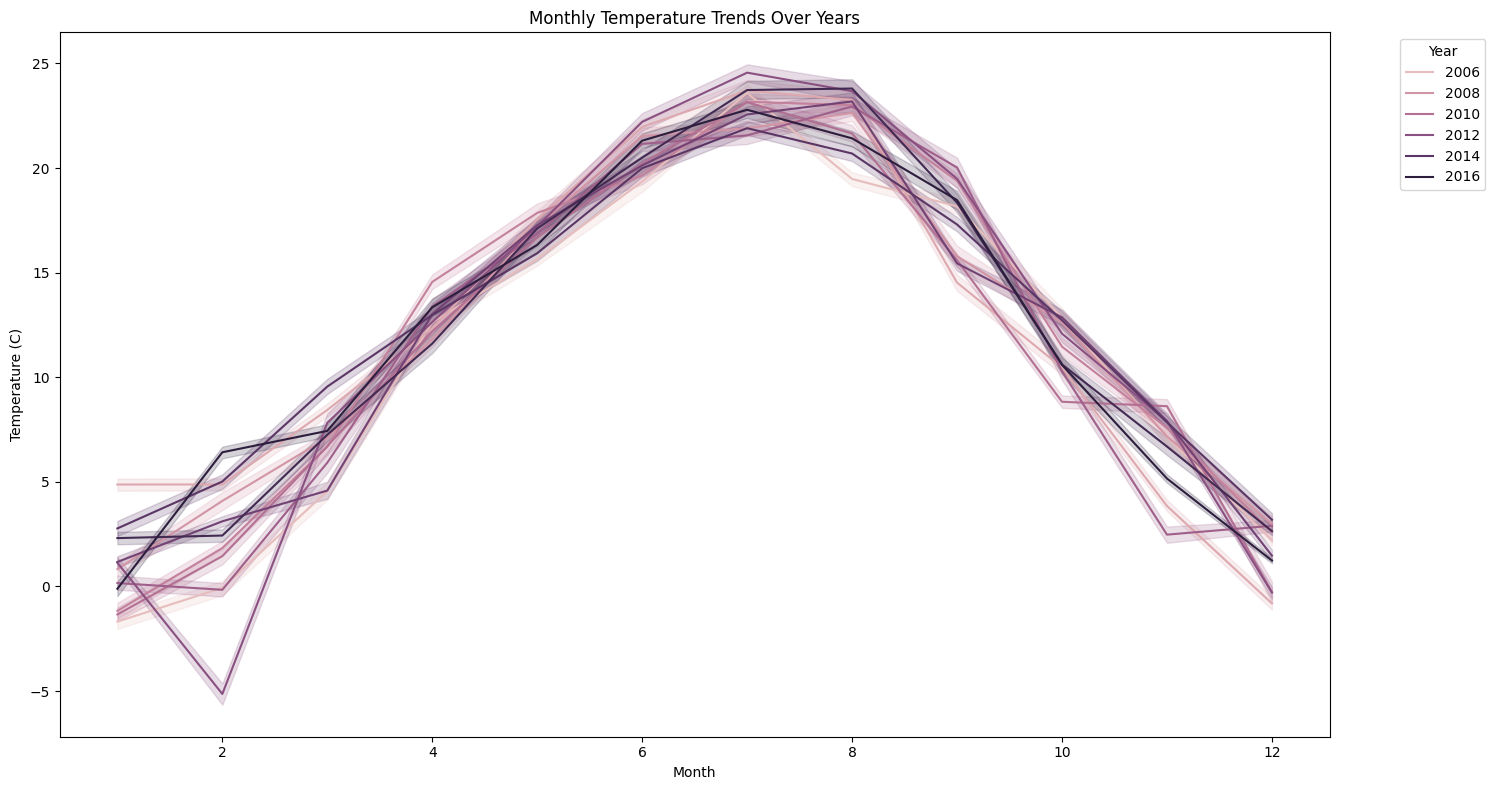

In [10]:
# Create a line plot showing monthly temperature trends over several year.
plt.figure(figsize=(15, 8))
sns.lineplot(data=df, x='Month', y='Temperature (C)', hue='Year')
plt.title('Monthly Temperature Trends Over Years')
plt.xlabel('Month')
plt.ylabel('Temperature (C)')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

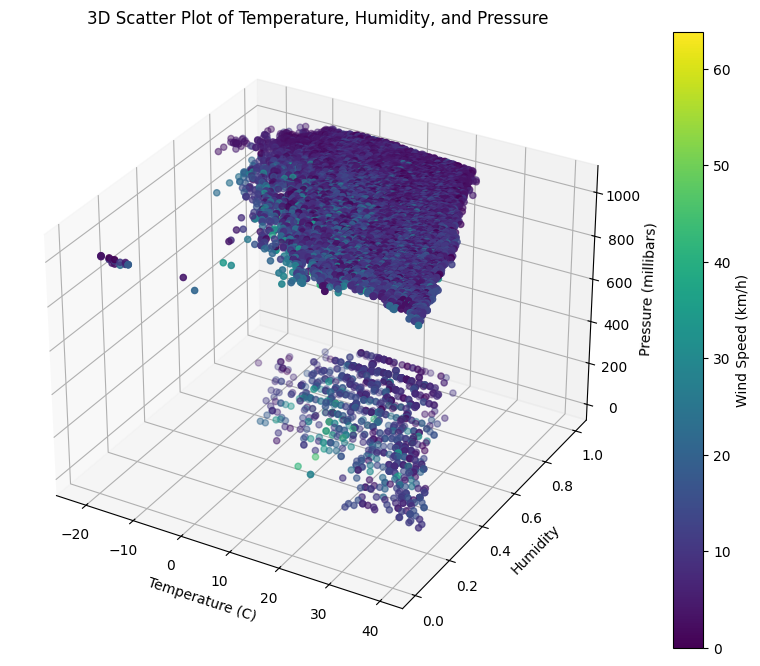

In [11]:
# Create a 3D scatter plot that visualizes the relationship between temperature, humidity, and pressure.
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df['Temperature (C)'], df['Humidity'], df['Pressure (millibars)'],
                     c=df['Wind Speed (km/h)'], cmap='viridis')
ax.set_xlabel('Temperature (C)')
ax.set_ylabel('Humidity')
ax.set_zlabel('Pressure (millibars)')
plt.colorbar(scatter, label='Wind Speed (km/h)')
plt.title('3D Scatter Plot of Temperature, Humidity, and Pressure')
plt.show()

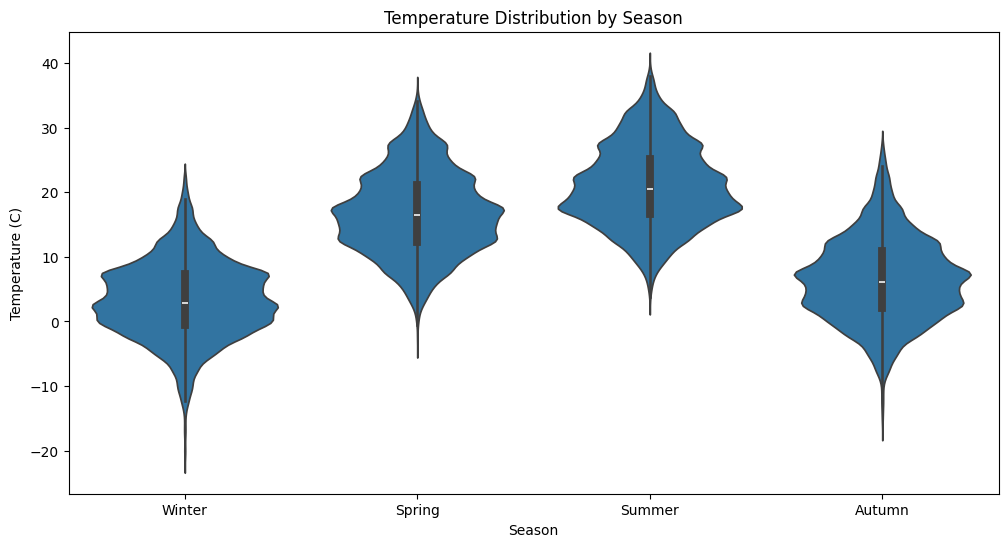

In [12]:
# Categorize months into seasons and visualize the temperature distribution for each season using a violin plot.
df['Season'] = pd.cut(df['Month'], bins=[0, 3, 6, 9, 12], labels=['Winter', 'Spring', 'Summer', 'Autumn'])
plt.figure(figsize=(12, 6))
sns.violinplot(x='Season', y='Temperature (C)', data=df)
plt.title('Temperature Distribution by Season')
plt.show()

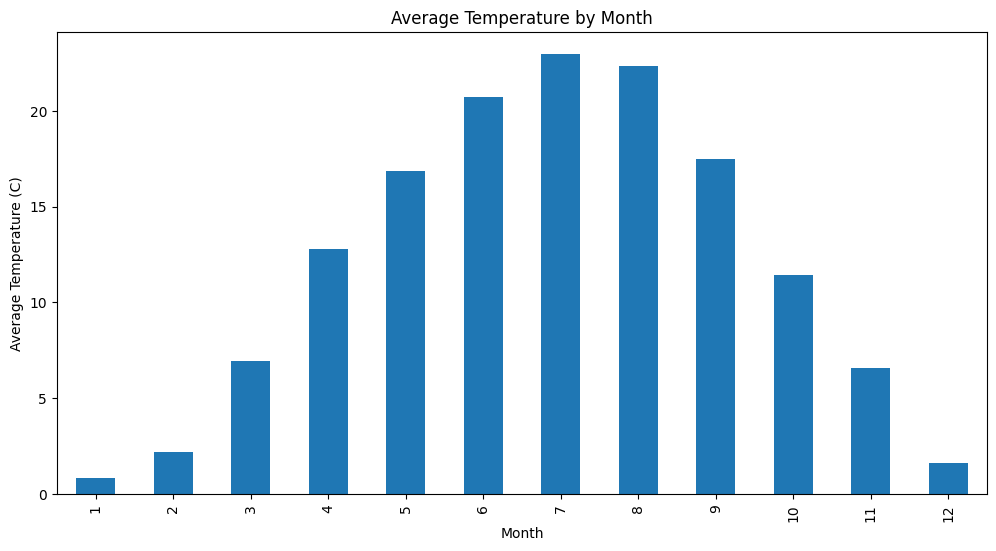

In [7]:
# Create a bar plot from the monthly_temp Series, showing the average temperature by month
plt.figure(figsize=(12, 6))
monthly_temp = df.groupby('Month')['Temperature (C)'].mean()
monthly_temp.plot(kind='bar')
plt.title('Average Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Average Temperature (C)')
plt.show()

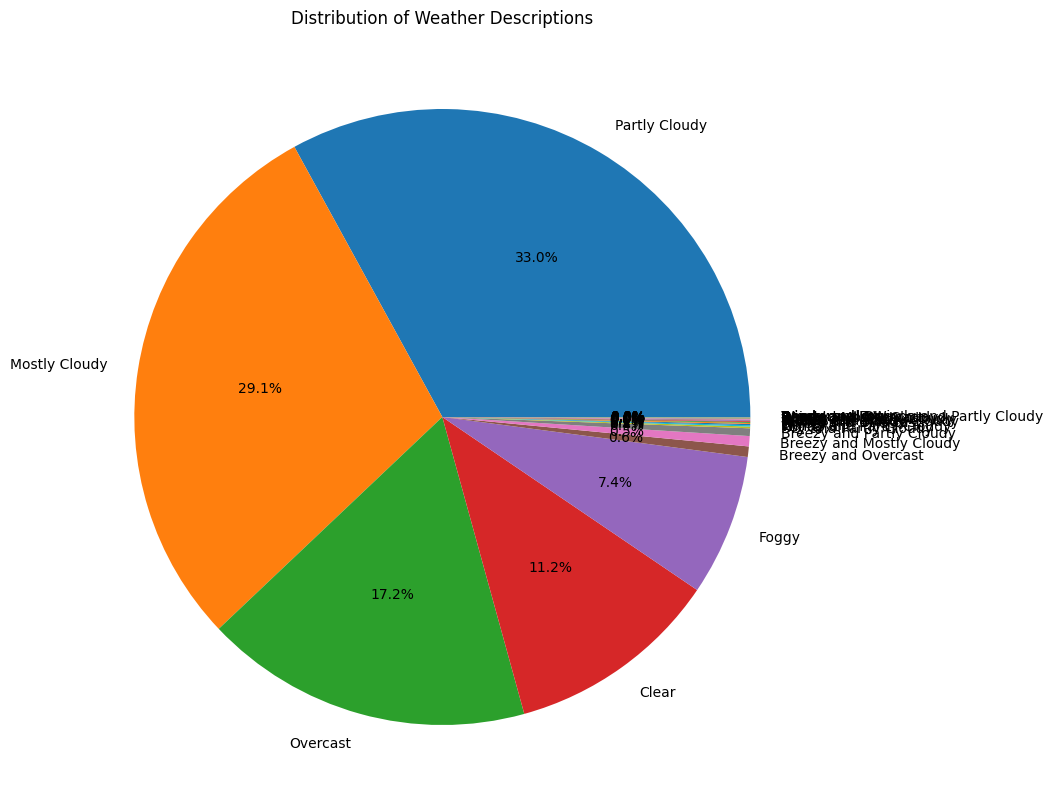

In [13]:
# Create a pie chart based on the value counts of the 'Summary' column, where each slice of the pie is labeled with its percentage value (to one decimal point)
plt.figure(figsize=(10, 10))
df['Summary'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Weather Descriptions')
plt.ylabel('')
plt.show()

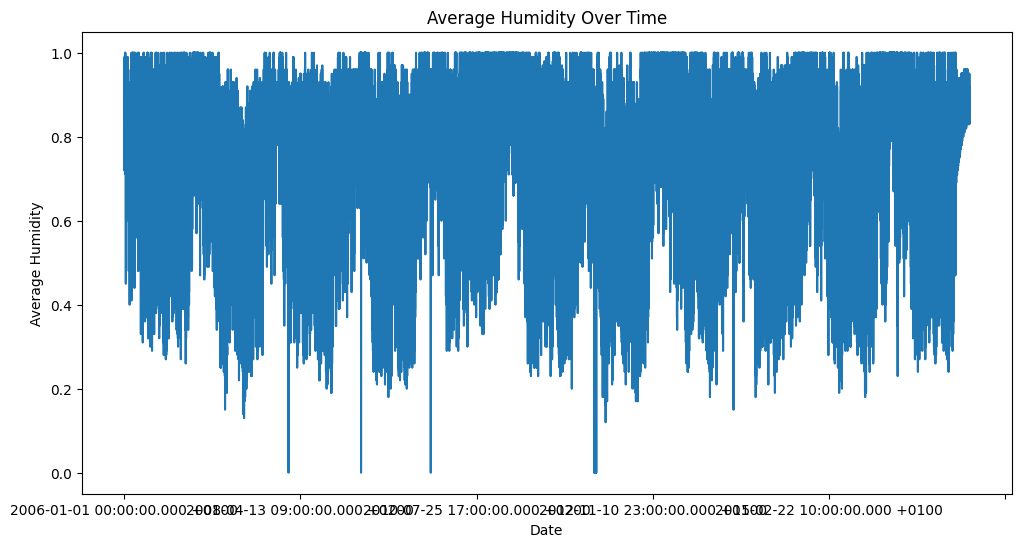

In [14]:
# Create a line plot showing the average humidity over time using the results from the grouped data
plt.figure(figsize=(12, 6))
df.groupby('Formatted Date')['Humidity'].mean().plot(kind='line')
plt.title('Average Humidity Over Time')
plt.xlabel('Date')
plt.ylabel('Average Humidity')
plt.show()

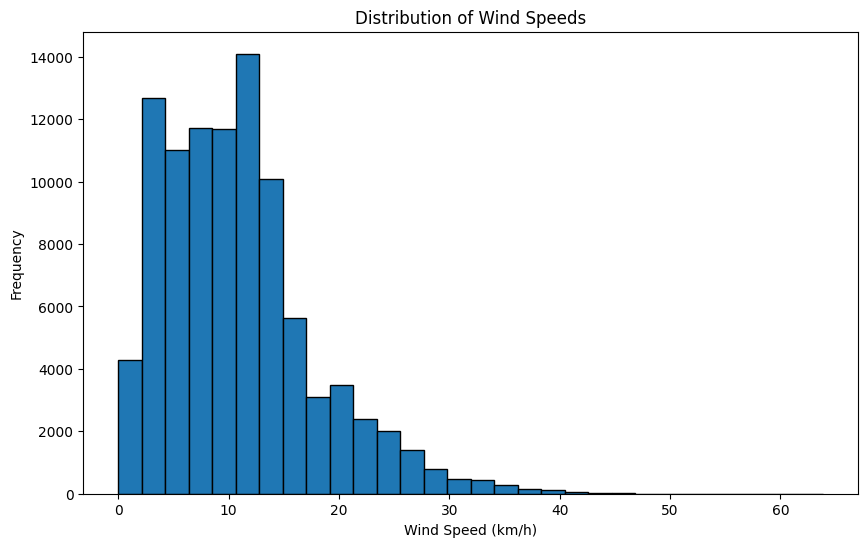

In [15]:
# Create a histogram to show the distribution of wind speeds using the 'Wind Speed (km/h)' column from a DataFrame df, dividing the data into 30 bins
plt.figure(figsize=(10, 6))
plt.hist(df['Wind Speed (km/h)'], bins=30, edgecolor='black')
plt.title('Distribution of Wind Speeds')
plt.xlabel('Wind Speed (km/h)')
plt.ylabel('Frequency')
plt.show()

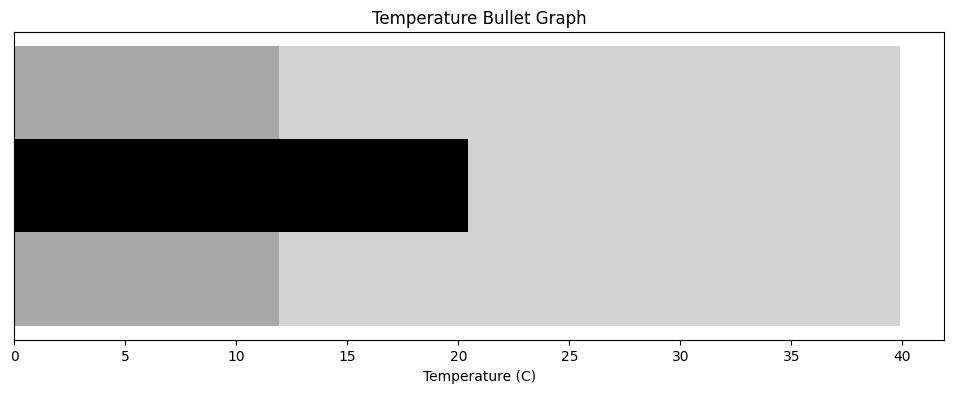

In [16]:
# Create a horizontal bar to represent the maximum temperature in a bullet graph, with the bar colored light grey
plt.figure(figsize=(12, 4))
avg_temp = df['Temperature (C)'].mean()
max_temp = df['Temperature (C)'].max()
current_temp = df['Temperature (C)'].iloc[-1]  # Using last recorded temperature as 'current'

plt.barh(y=1, width=max_temp, height=0.3, color='lightgrey')
plt.barh(y=1, width=avg_temp, height=0.3, color='darkgrey')
plt.barh(y=1, width=current_temp, height=0.1, color='black')

plt.yticks([])
plt.title('Temperature Bullet Graph')
plt.xlabel('Temperature (C)')
plt.show()

C:\Users\singh\AppData\Local\Temp\ipykernel_17560\661535046.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Season')['Pressure (millibars)'].mean().plot(kind='bar')


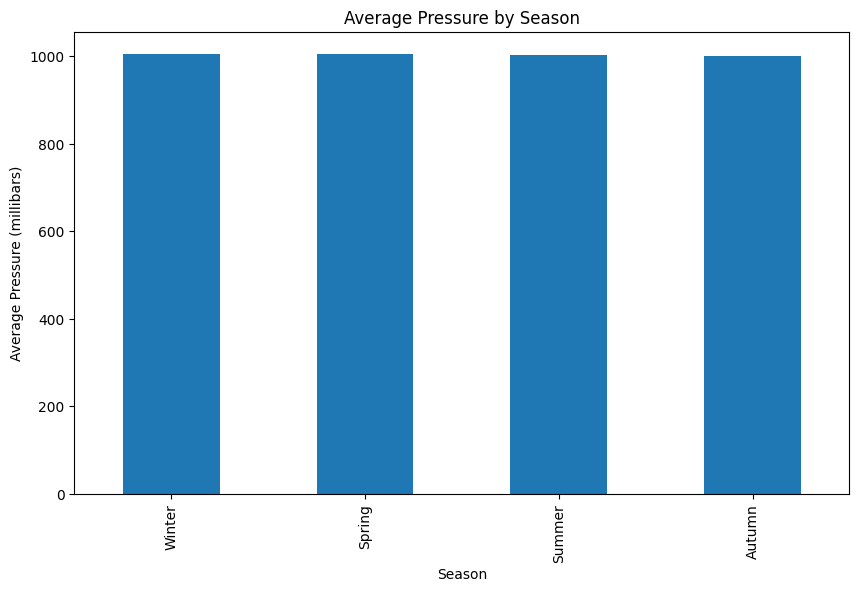

In [14]:
# Create a bar plot to show the average pressure by season using the results from the grouped data
plt.figure(figsize=(10, 6))
df.groupby('Season')['Pressure (millibars)'].mean().plot(kind='bar')
plt.title('Average Pressure by Season')
plt.xlabel('Season')
plt.ylabel('Average Pressure (millibars)')
plt.show()

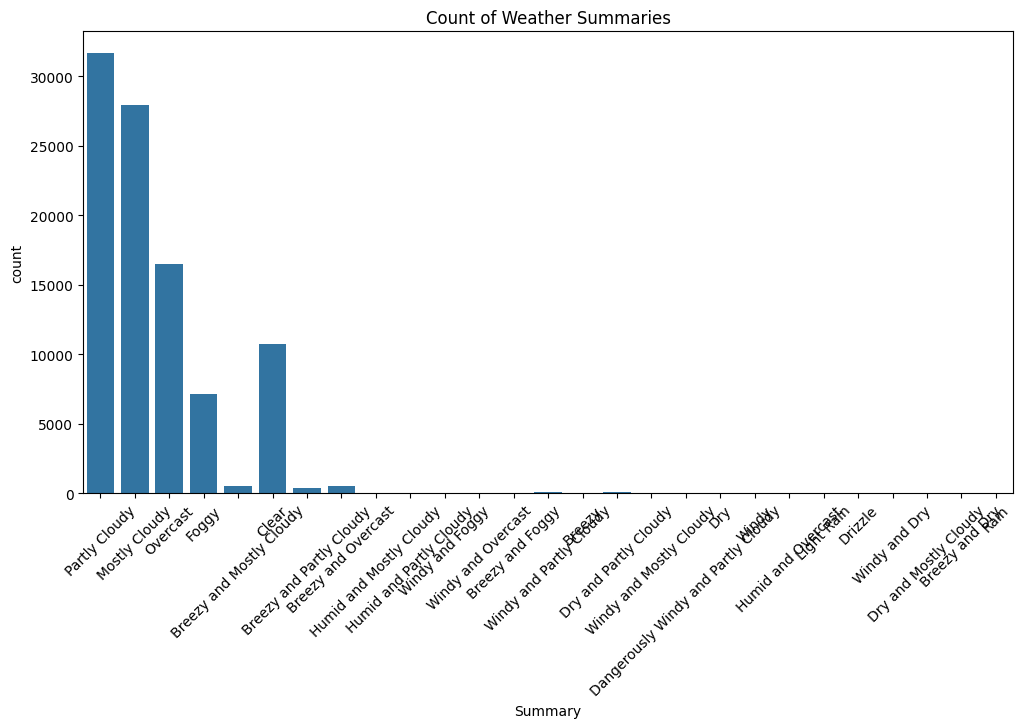

In [17]:
# Create a count plot using Seaborn to show the occurrences of each unique weather summary from the 'Summary' column of a DataFrame df
plt.figure(figsize=(12, 6))
sns.countplot(x='Summary', data=df)
plt.title('Count of Weather Summaries')
plt.xticks(rotation=45)
plt.show()

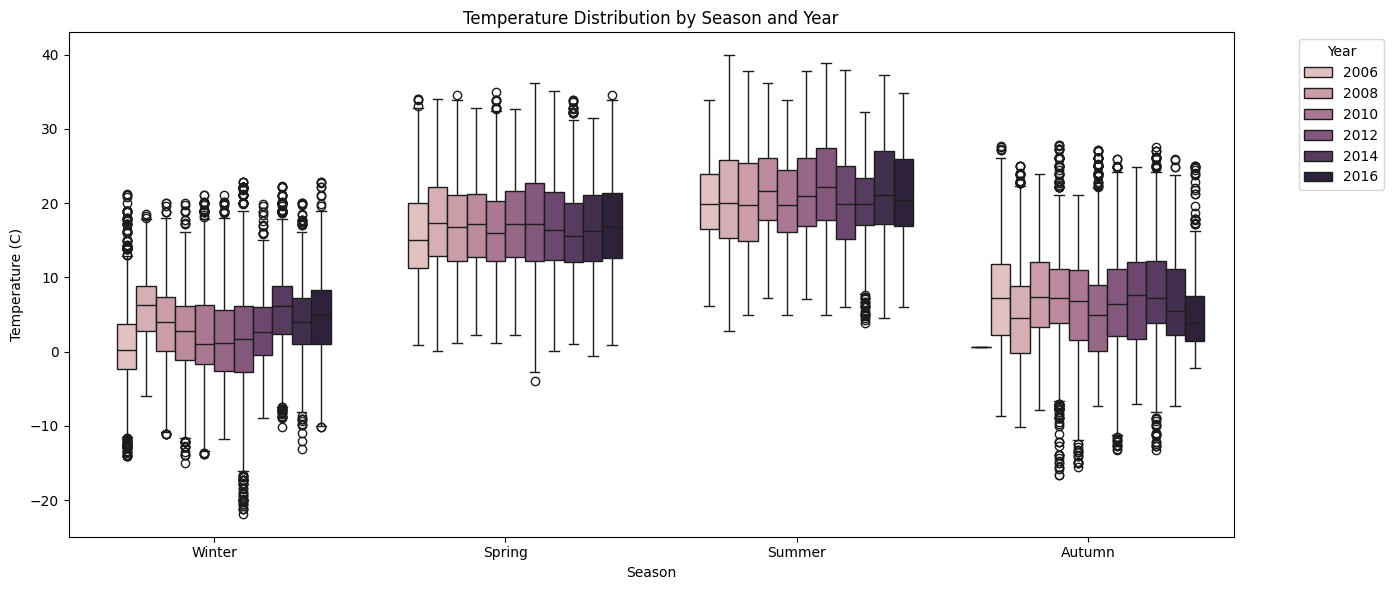

In [18]:
# Create a box plot using Seaborn to show the distribution of temperatures (in Celsius) across different seasons using the 'Season' column for the x-axis and the 'Temperature (C)' column for the y-axis
plt.figure(figsize=(14, 6))
sns.boxplot(x='Season', y='Temperature (C)', hue='Year', data=df)
plt.title('Temperature Distribution by Season and Year')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

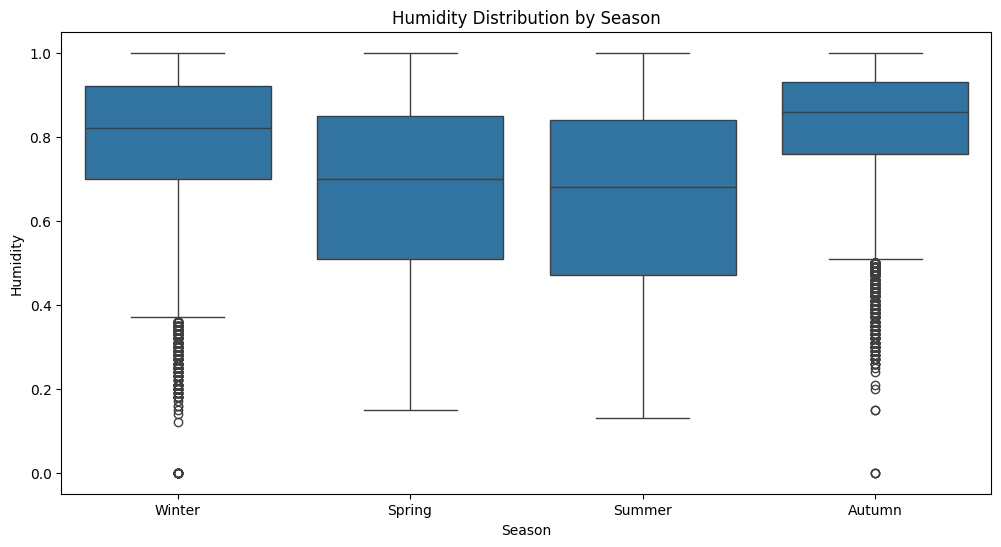

In [19]:
# Side by Side Box Plot: Humidity distribution by season
plt.figure(figsize=(12, 6))
sns.boxplot(x='Season', y='Humidity', data=df)
plt.title('Humidity Distribution by Season')
plt.show()

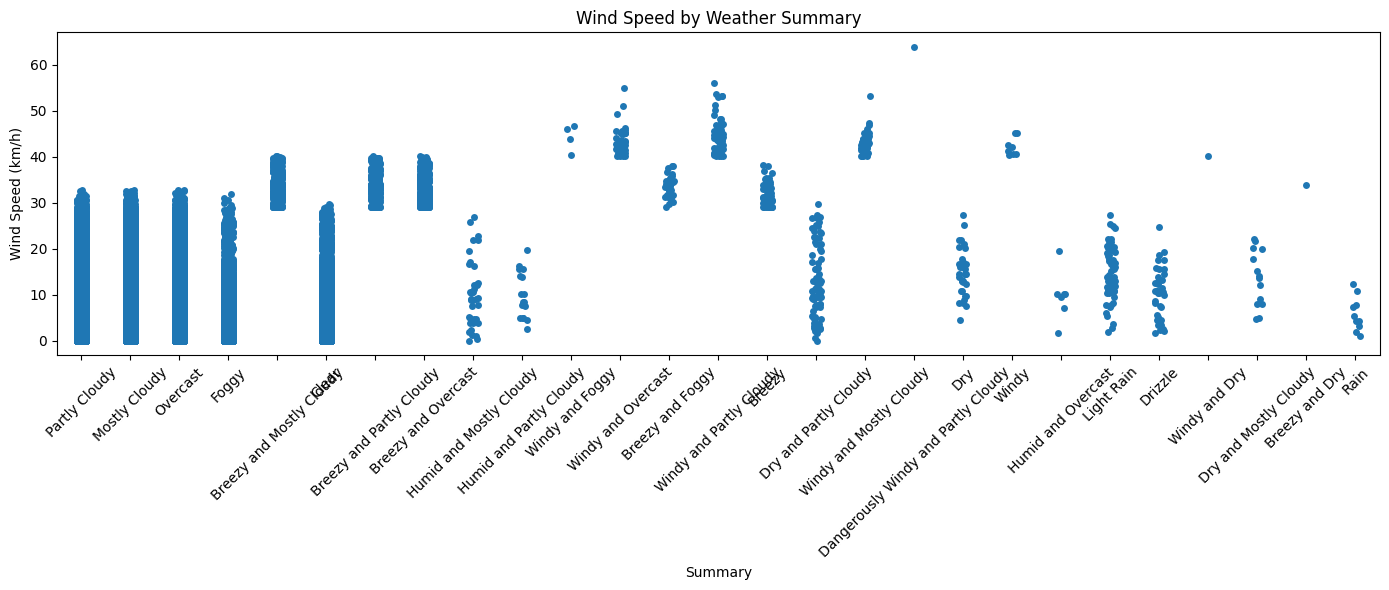

In [20]:
# Create a strip plot using Seaborn to display wind speed values (in km/h) for different weather summaries, with the 'Summary' column on the x-axis and the 'Wind Speed (km/h)' column on the y-axis
plt.figure(figsize=(14, 6))
sns.stripplot(x='Summary', y='Wind Speed (km/h)', data=df, jitter=True)
plt.title('Wind Speed by Weather Summary')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

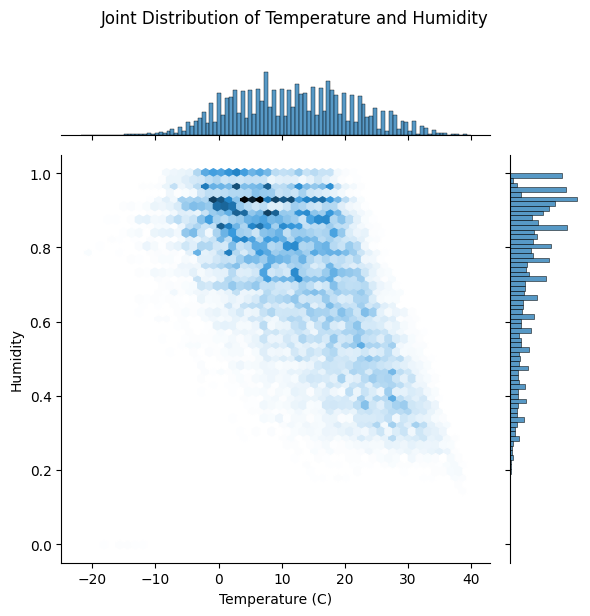

In [21]:
# Create a joint plot using Seaborn to show the relationship between temperature and humidity, with 'Temperature (C)' on the x-axis and 'Humidity' on the y-axis
sns.jointplot(x='Temperature (C)', y='Humidity', data=df, kind='hex')
plt.suptitle('Joint Distribution of Temperature and Humidity', y=1.02)
plt.tight_layout()
plt.show()

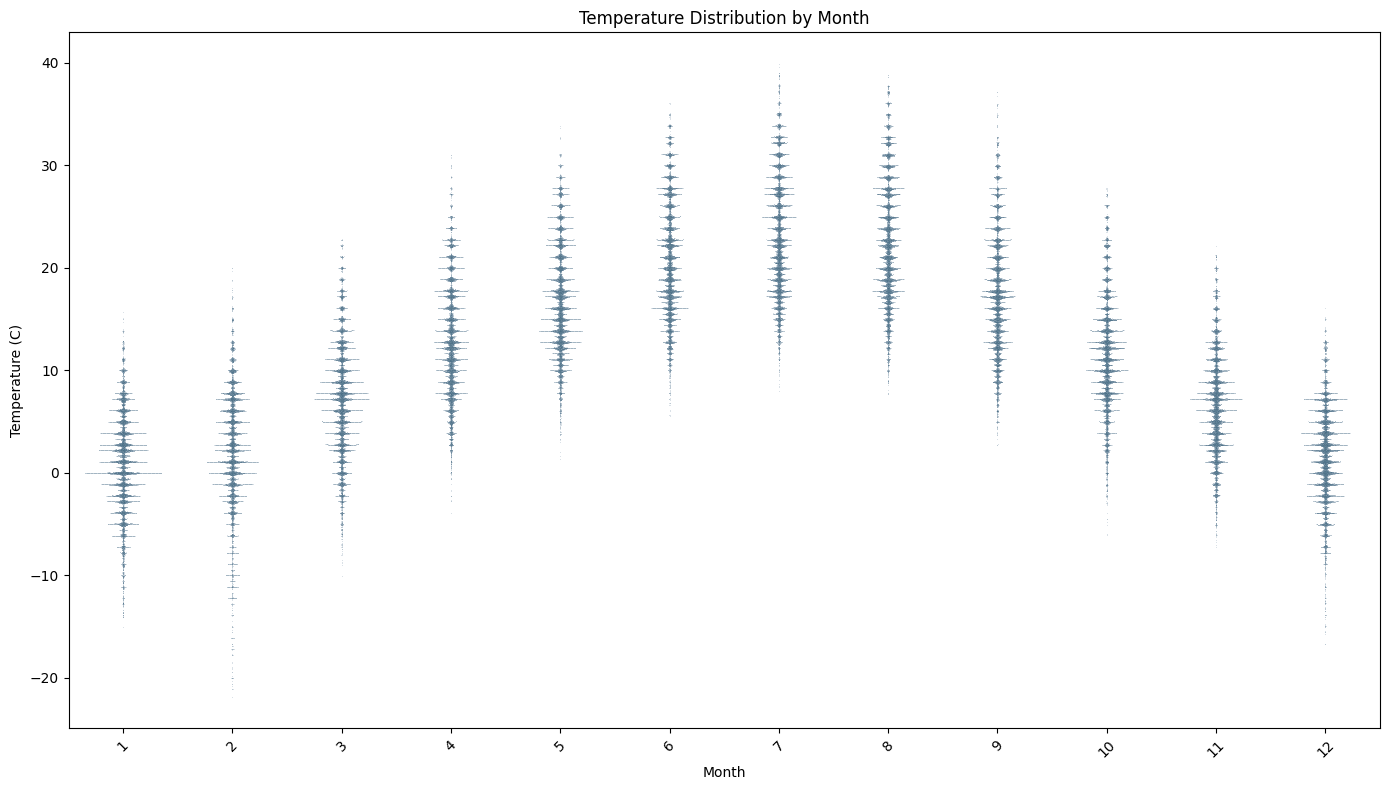

In [11]:
# Create a swarm plot using Seaborn to show the distribution of temperatures (in °C) for different months, with the 'Month' column on the x-axis and the 'Temperature (C)' column on the y-axis

plt.figure(figsize=(14, 8))
sns.swarmplot(x='Month', y='Temperature (C)', data=df, size=0.25)
plt.title('Temperature Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Temperature (C)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 1400x800 with 0 Axes>

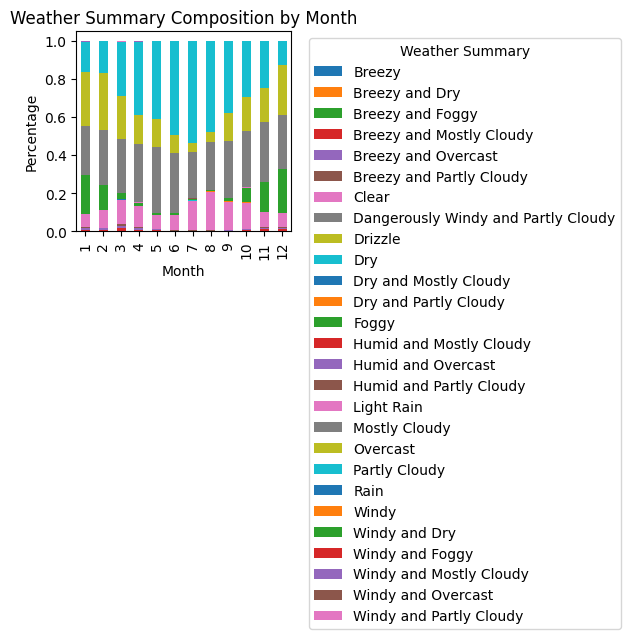

In [12]:
# Generate a stacked bar plot using the percentage DataFrame, where each bar represents a month and the segments represent different weather summaries
weather_by_month = df.groupby(['Month', 'Summary']).size().unstack(fill_value=0)
weather_by_month_percentage = weather_by_month.div(weather_by_month.sum(axis=1), axis=0)
plt.figure(figsize=(14, 8))
weather_by_month_percentage.plot(kind='bar', stacked=True)
plt.title('Weather Summary Composition by Month')
plt.xlabel('Month')
plt.ylabel('Percentage')
plt.legend(title='Weather Summary', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

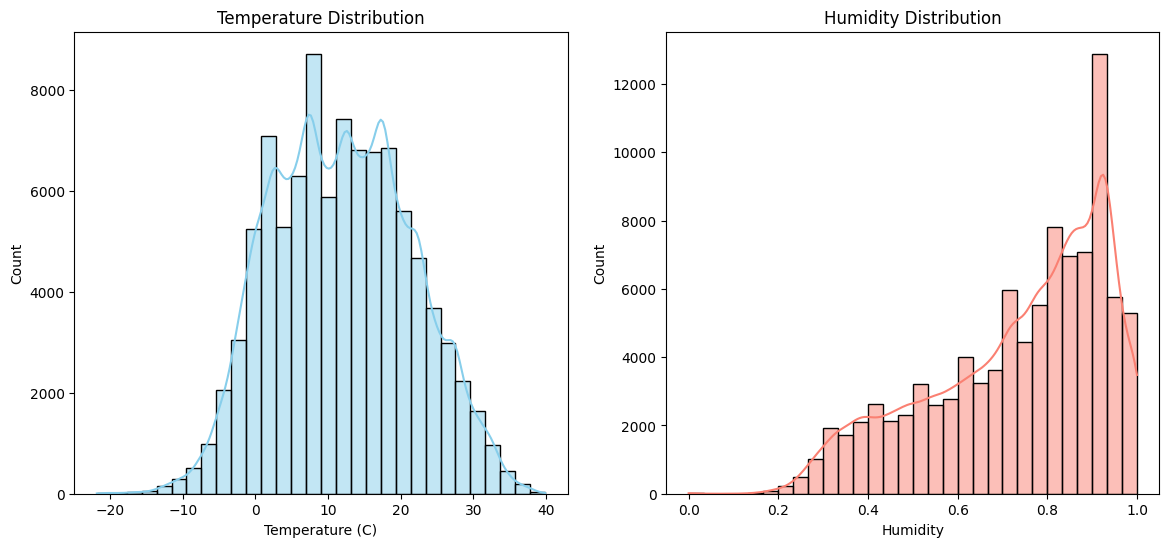

In [17]:
# Distribution plot
# Create a histogram for temperature data (in °C) using Seaborn's histplot function, including a Kernel Density Estimate (KDE) line.
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Temperature (C)'], kde=True, color='skyblue', bins=30)
plt.title('Temperature Distribution')
plt.xlabel('Temperature (C)')
plt.subplot(1, 2, 2)
sns.histplot(df['Humidity'], kde=True, color='salmon', bins=30)
plt.title('Humidity Distribution')
plt.xlabel('Humidity')
plt.show()

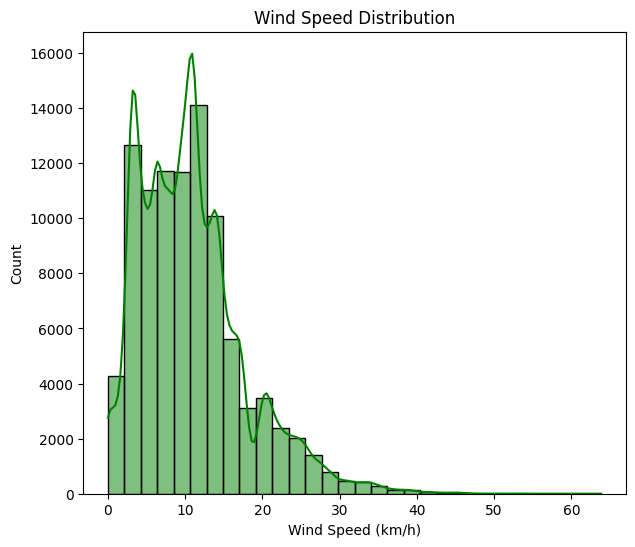

In [19]:
# Wind speed distribution
plt.figure(figsize=(7, 6))
sns.histplot(df['Wind Speed (km/h)'], kde=True, color='green', bins=30)
plt.title('Wind Speed Distribution')
plt.xlabel('Wind Speed (km/h)')
plt.show()

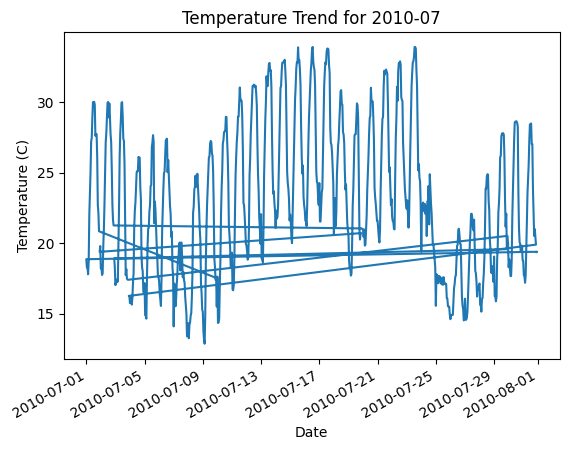

In [6]:
# Create a GUI using tkinter which shows highest lowest humidity, frequent precipitation type, average temperature and plot temperature trend.
import pandas as pd
import tkinter as tk
from tkinter import messagebox
import matplotlib.pyplot as plt

root = tk.Tk()
root.title("Weather Data Analysis")
root.geometry("400x300")
def average_temperature():
    date = date_entry.get()
    date = f"{date} 22:00:00+00:00"
    try:
        avg_temp = df.loc[date]['Temperature (C)'].mean()
        messagebox.showinfo("Average Temperature", f"The average temperature on {date} is {avg_temp:.2f}°C")
    except KeyError as e:
        print(e)
        print(df.loc[0])
        messagebox.showerror("Error", "Date not found in dataset")

def highest_lowest_humidity():
    max_humidity = df['Humidity'].max()
    min_humidity = df['Humidity'].min()
    messagebox.showinfo("Humidity Levels", f"Max Humidity: {max_humidity:.2f}\nMin Humidity: {min_humidity:.2f}")

def frequent_precip_type():
    freq_precip = df['Precip Type'].mode()[0]
    messagebox.showinfo("Precipitation Type", f"The most frequent precipitation type is: {freq_precip}")

def plot_temperature_trend():
    year = year_entry.get()
    month = month_entry.get()
    try:
        df_month = df.loc[f'{year}-{month}']['Temperature (C)']
        df_month.plot(title=f"Temperature Trend for {year}-{month}")
        plt.xlabel("Date")
        plt.ylabel("Temperature (C)")
        plt.show()
    except KeyError:
        messagebox.showerror("Error", "Date range not found in dataset")

tk.Label(root, text="Enter Date (YYYY-MM-DD):").pack(pady=5)
date_entry = tk.Entry(root)
date_entry.pack()

tk.Button(root, text="Get Average Temperature", command=average_temperature).pack(pady=5)
tk.Button(root, text="Get Highest/Lowest Humidity", command=highest_lowest_humidity).pack(pady=5)
tk.Button(root, text="Most Frequent Precipitation Type", command=frequent_precip_type).pack(pady=5)

tk.Label(root, text="Enter Year and Month:").pack(pady=5)
year_entry = tk.Entry(root)
year_entry.pack()
month_entry = tk.Entry(root)
month_entry.pack()

tk.Button(root, text="Plot Temperature Trend", command=plot_temperature_trend).pack(pady=5)
root.mainloop()